In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from datasets import load_dataset

dataset = load_dataset("emotion")
df = pd.DataFrame(dataset['train'])
df['Emotion'] = df['label'].map(dataset['train'].features['label'].int2str)
df = df[['Emotion', 'text']]
df.columns = ['Emotion', 'Text']

c:\Users\Nikhil Gupta\Downloads\Text-Emotion-Detection-main\Text-Emotion-Detection-main\Text Emotion Detection\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Nikhil Gupta\Downloads\Text-Emotion-Detection-main\Text-Emotion-Detection-main\Text Emotion Detection\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Nikhil Gupta\.cache\huggingface\hub\datasets--emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cac

In [ ]:
import neattext.functions as nfx

df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
df

,Emotion,Text,Clean_Text
0,sadness,i didnt feel humiliated,didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...,feeling hopeless damned hopeful cares awake
2,anger,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...,feeling nostalgic fireplace know property
4,anger,i am feeling grouchy,feeling grouchy
...,...,...,...
15995,sadness,i just had a very brief time in the beanbag an...,brief time beanbag said anna feel like beaten
15996,sadness,i am now turning and i feel pathetic that i am...,turning feel pathetic waiting tables subbing t...
15997,joy,i feel strong and good overall,feel strong good overall
15998,anger,i feel like this was such a rude comment and i...,feel like rude comment im glad


In [8]:
x = df['Clean_Text']
y = df['Emotion']

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [10]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.8879166666666667

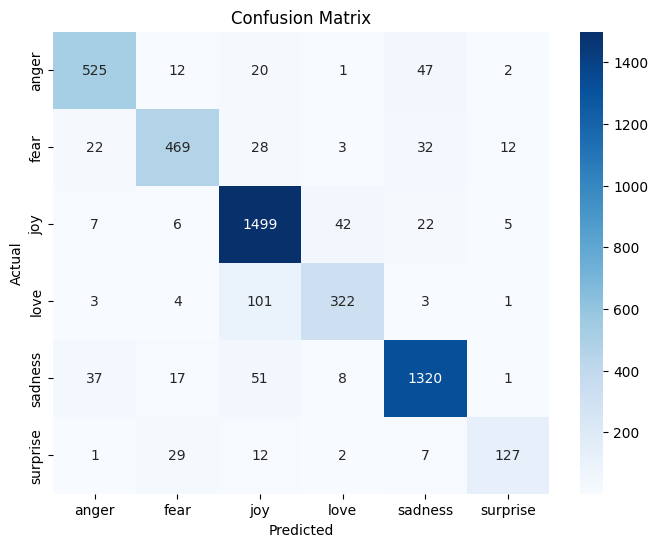

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = pipe_lr.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=pipe_lr.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipe_lr.classes_, yticklabels=pipe_lr.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
import joblib
pipeline_file = open("result.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()